In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import eda

In [2]:
data = pd.read_parquet('banca_sample.parquet')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 672 entries, REF_TIME to BOND_MAX_MATCHING_DATE_SELL_6M
dtypes: category(2), float64(666), int32(3), object(1)
memory usage: 51.0+ MB


,REF_TIME,CUSID,LABEL_TIME,LABEL,GENDER,CITY,AGE,MONTH_ON_BANK,CASA_BAL_MEAN_BAL_INCREASE_GREATER_1E6_6M,CASA_BAL_MEAN_BAL_INCREASE_GREATER_30E6_6M,...,BOND_MEAN_ORDER_SELL_6M,BOND_MAX_ORDER_SELL_6M,BOND_MEAN_MAX_QUANTITY_SELL_6M,BOND_STD_QUANTITY_SELL_6M,BOND_AVG_MEAN_QUANTITY_SELL_6M,BOND_MEAN_MAX_VOLUME_SELL_6M,BOND_MEAN_STD_VOLUME_SELL_6M,BOND_AVG_MEAN_VOLUME_SELL_6M,BOND_MEAN_NUM_SALEID_SELL_6M,BOND_MAX_MATCHING_DATE_SELL_6M
0,20210630,20652348,202108,0,FEMALE,HO-CHI-MINH,30.0,161.0,0.028090,0.005618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20210731,25296202,202109,0,FEMALE,HA-NOI,33.0,114.0,0.033333,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20201130,21425455,202101,0,FEMALE,HA-NOI,31.0,141.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20220228,32064176,202204,0,MALE,HA-NOI,25.0,50.0,0.055249,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20210831,30730483,202110,0,FEMALE,HA-NOI,27.0,58.0,0.206522,0.114130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


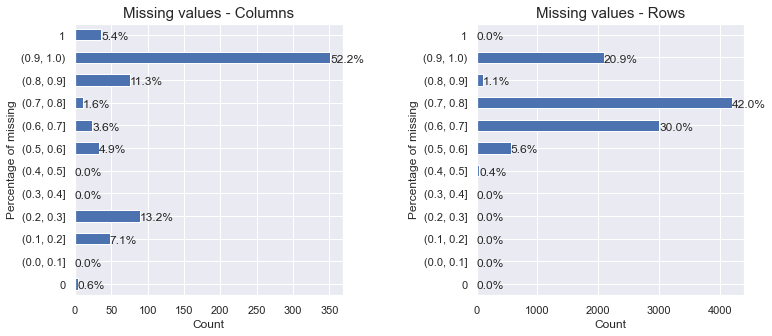

In [3]:
eda.count_missing_values(data)

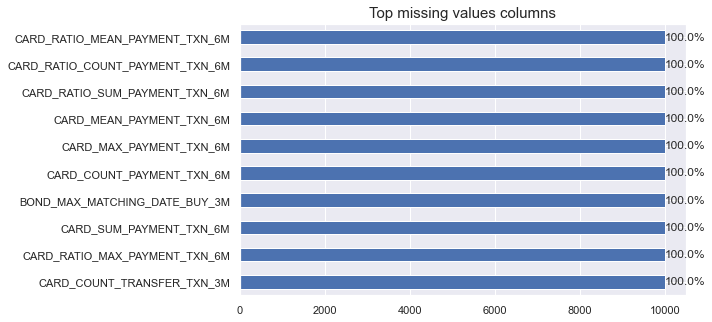

In [4]:
eda.top_missing_columns(data)

In [5]:
columns = data.select_dtypes(include=np.number).columns
columns = columns[0:10]
columns

Index(['REF_TIME', 'LABEL_TIME', 'LABEL', 'AGE', 'MONTH_ON_BANK',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_1E6_6M',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_30E6_6M',
       'CASA_BAL_VARIANCE_BAL_CHANGE_6M',
       'CASA_BAL_MEAN_BAL_DECREASE_LOWER_1E6_6M',
       'CASA_BAL_MEAN_BAL_INCREASE_GREATER_5E6_6M'],
      dtype='object')

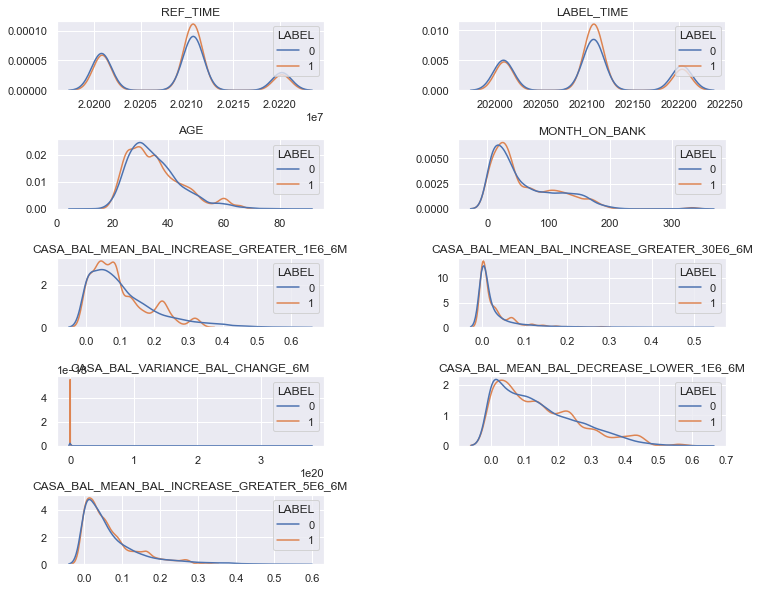

In [6]:
eda.displot(data[columns], 'LABEL', 'kde')

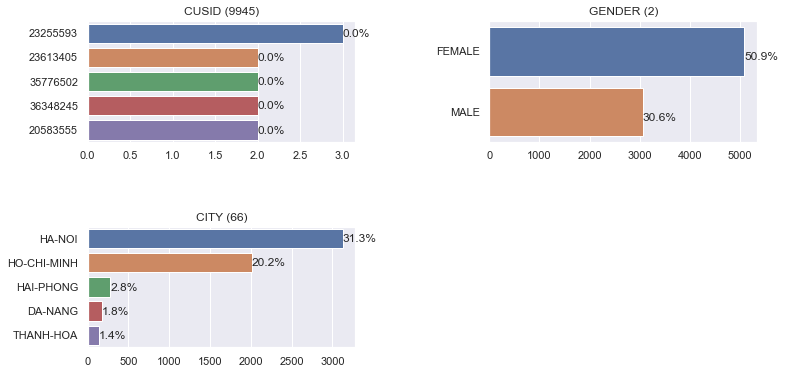

In [11]:
eda.countplot(data, figsize=(12, 6))

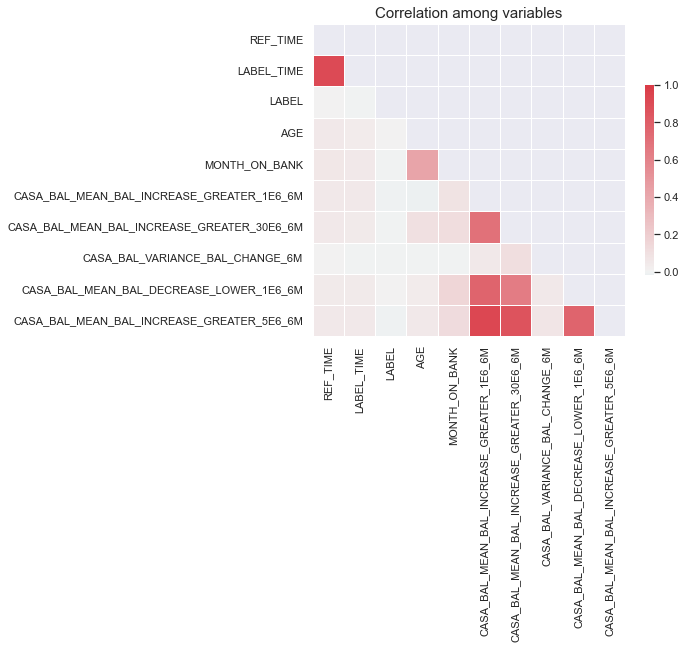

In [12]:
eda.correlation_matrix(data[columns])

In [13]:
col_count

HA-NOI         3127
HO-CHI-MINH    2016
HAI-PHONG       278
DA-NANG         178
THANH-HOA       139
               ... 
NHA-TRANG         2
BAC-KAN           1
VUNG-TAU          1
*TINH-KHAC*       0
LAI-CHAU          0
Name: CITY, Length: 68, dtype: int64

In [22]:
col_count.iloc[5]

116

In [33]:
5%5

0

0
1
2
3
4
0
1
2
3
4


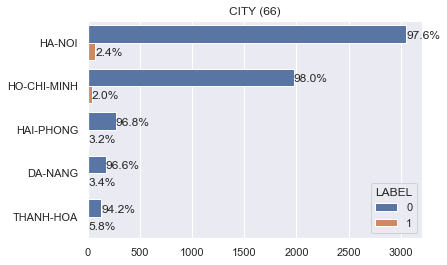

In [45]:
nclass = min(nclass, data[col].nunique())
order = data[col].value_counts().iloc[0: nclass].index
# config plot
ax = sns.countplot(
    y=col,
    data=data,
    order=order,
    hue=label
)
# add percentage to the plot
total = data.shape[0]
col_count = data[col].value_counts()
for i, p in enumerate(ax.patches):
    if label is None:
        percentage = 100 * p.get_width() / total
        percentage = f'{percentage:.1f}%'
    else:
        col_index = i % nclass
        print(col_index)
        percentage = 100 * p.get_width() / col_count.iloc[col_index]
        percentage = f'{percentage:.1f}%'
    x = p.get_x() + p.get_width()
    # if label is None:
    #     y_adjust = 0.55
    # else:
    #     y_adjust = 0.35
    y = p.get_y()  + 0.3
    ax.annotate(percentage, (x, y))
# label and title
plt.title(f'{col} ({data[col].nunique()})', size=12)
plt.xlabel('')
plt.ylabel('');

In [25]:
col_count

HA-NOI         3127
HO-CHI-MINH    2016
HAI-PHONG       278
DA-NANG         178
THANH-HOA       139
               ... 
NHA-TRANG         2
BAC-KAN           1
VUNG-TAU          1
*TINH-KHAC*       0
LAI-CHAU          0
Name: CITY, Length: 68, dtype: int64